<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/heart-disease-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install Keras
! pip install scikeras

In [9]:
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, recall_score,accuracy_score
from keras.models import Sequential
from keras import Input

import seaborn as sns
import tensorflow as tf

from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import LSTM
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay


In [10]:
data=pd.read_csv('heart.csv')

In [11]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
lbl=LabelEncoder()
categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for i in categorical:
  data[i]=lbl.fit_transform(data[i])

In [14]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [15]:
y=data['HeartDisease']
X=data.drop('HeartDisease',axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

**The Gaussian Naive Bytes Classifier**

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
gnb.score(X_test,y_test)


0.8188405797101449

Gaussian Naive Bytes Classifier
[[ 71  42]
 [  8 155]]


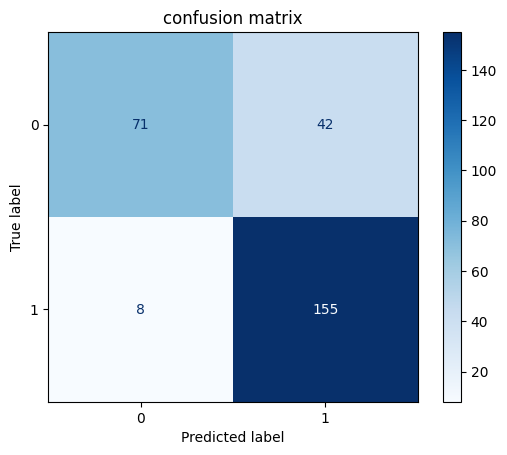

In [24]:
disp = ConfusionMatrixDisplay.from_estimator(
        gnb,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None)

disp.ax_.set_title('confusion matrix')

print('Gaussian Naive Bytes Classifier')
print(disp.confusion_matrix)
plt.show()

In [25]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

The accuracy for Naive Bytes= 0.8188405797101449
Recall: 0.950920245398773


**The Logistic Regression**

In [26]:
logisticRegressionmodel=LogisticRegression()
logisticRegressionmodel.fit(X_train,y_train)
y_pred=logisticRegressionmodel.predict(X_test)




LOgistic regression
[[ 93  20]
 [ 26 137]]


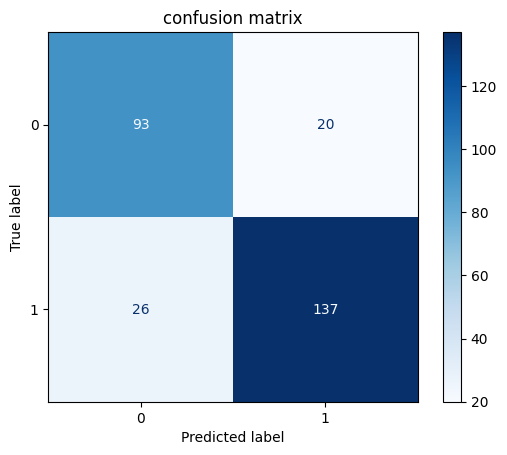

In [28]:


disp = ConfusionMatrixDisplay.from_estimator(
        logisticRegressionmodel,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None)

disp.ax_.set_title('confusion matrix')

print('LOgistic regression')
print(disp.confusion_matrix)
plt.show()


In [29]:
print("The accuracy for Logsitic Regresion= "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Logsitic Regresion= 83.33333333333334
Recall: 84.04907975460122


KNN algorithm

In [31]:
score=[]
for i in range(1,50):
    knnalgo=KNeighborsClassifier(n_neighbors=i)
    knnalgo.fit(X_train,y_train)
    y_pred=knnalgo.predict(X_test)
    temp=mean_squared_error(y_test,y_pred)
    score.append(temp)

knnalgo=KNeighborsClassifier(n_neighbors=26)
knnalgo.fit(X_train, y_train)
y_pred = knnalgo.predict(X_test)

In [33]:
temp=mean_squared_error(y_test, y_pred)
temp

0.16666666666666666

KNN algorithm
[[ 88  25]
 [ 21 142]]


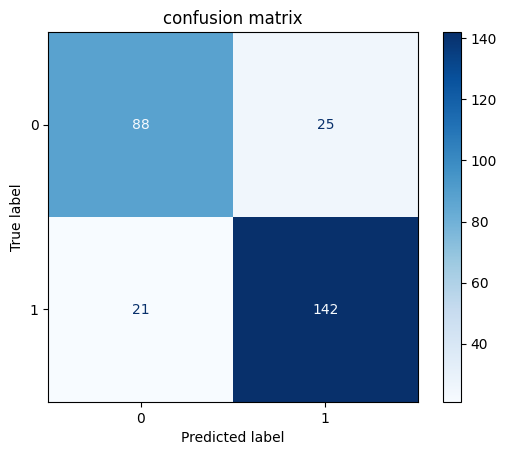

In [35]:
disp = ConfusionMatrixDisplay.from_estimator(
        knnalgo,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=None)

disp.ax_.set_title('confusion matrix')

print('KNN algorithm')
print(disp.confusion_matrix)
plt.show()


In [36]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Naive Bytes= 83.33333333333334
Recall: 87.11656441717791


**RandomForestRegressor**

In [37]:
regressor = RandomForestRegressor(n_estimators = 75,max_depth=4)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_pred=(y_pred>0.5)

y_test=list(y_test)
y_pred=list(y_pred)


pred_train=regressor.predict(X_train)
pred_train=(pred_train>0.5)

print("The accuracy for Random Forest Regressor= "+str(accuracy_score(y_train,pred_train)*100))
print("Recall: "+str(recall_score(y_train, pred_train)*100))

print("The Test accuracy for Random Forest Regressor= "+str(accuracy_score(y_test,y_pred)*100))
print("Test Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Random Forest Regressor= 90.96573208722741
Recall: 93.6231884057971
The Test accuracy for Random Forest Regressor= 83.33333333333334
Test Recall: 83.43558282208589


Accuracy: 90.96573208722741
Recall: 93.6231884057971


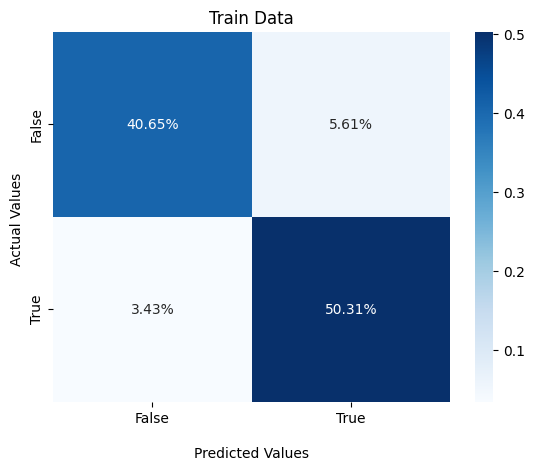

In [38]:
conf_train=confusion_matrix(y_train,pred_train)
print("Accuracy: "+str(accuracy_score(y_train,pred_train)*100))
print("Recall: "+str(recall_score(y_train, pred_train)*100))
ax = sns.heatmap(conf_train/np.sum(conf_train), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Train Data');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Accuracy: 83.33333333333334
Recall: 83.43558282208589


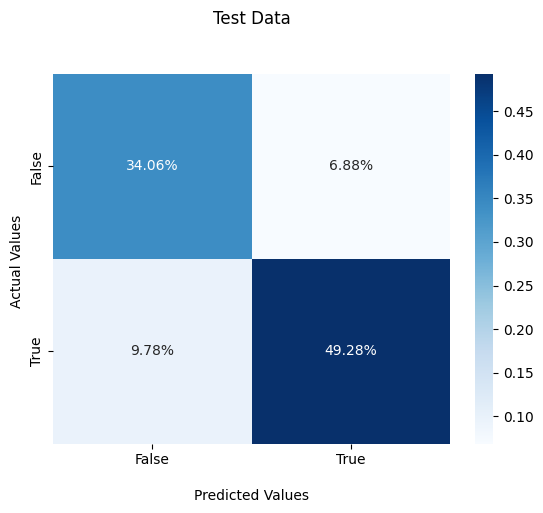

In [39]:
conf_test=confusion_matrix(y_test,y_pred)
print("Accuracy: "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))
ax = sns.heatmap(conf_test/np.sum(conf_test), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Test Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.8331071176502525


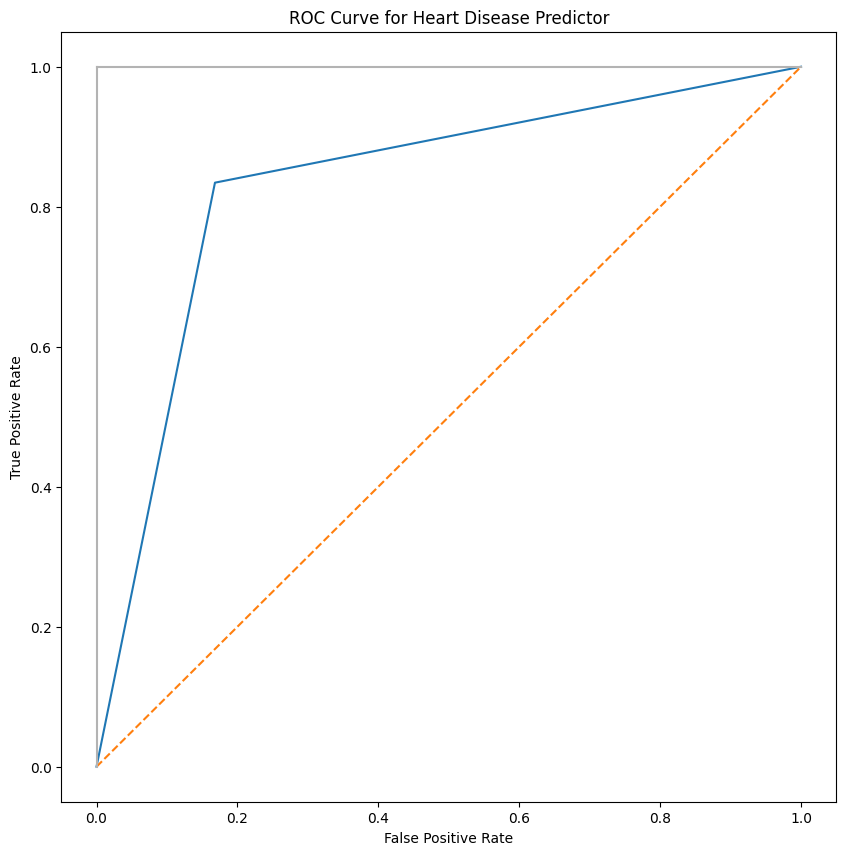

In [40]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
auc=roc_auc_score(y_test,y_pred)
print(auc)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for Heart Disease Predictor')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**ANN Model**

In [41]:
annmodel = Sequential([Dense(units=4,input_shape=(11,),activation='relu'),
                    Dense(units=6,activation='relu'),
                    keras.layers.Dropout(0.3),
                    Dense(units=8,activation='relu'),
                    keras.layers.Dropout(0.3),
                    Dense(units=1,activation='sigmoid')])

In [42]:
annmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
annmodel.fit(X_train, y_train,
          batch_size=1,
          epochs=100,
          verbose='auto')

Epoch 1/100
642/642 [==============================] - 6s 4ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/100
642/642 [==============================] - 2s 3ms/step - loss: 0.6908 - accuracy: 0.5530
Epoch 3/100
642/642 [==============================] - 2s 3ms/step - loss: 0.6750 - accuracy: 0.6604
Epoch 4/100
642/642 [==============================] - 1s 2ms/step - loss: 0.6167 - accuracy: 0.7165
Epoch 5/100
642/642 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.7430
Epoch 6/100
642/642 [==============================] - 2s 2ms/step - loss: 0.5811 - accuracy: 0.7290
Epoch 7/100
642/642 [==============================] - 1s 2ms/step - loss: 0.5746 - accuracy: 0.7336
Epoch 8/100
642/642 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7461
Epoch 9/100
642/642 [==============================] - 1s 2ms/step - loss: 0.5403 - accuracy: 0.7648
Epoch 10/100
642/642 [==============================] - 1s 2ms/step - loss: 0.5415 - accura

In [44]:
pred_train = annmodel.predict(X_train)
pred_test = annmodel.predict(X_test)
pred_train = (pred_train > 0.5)
pred_test = (pred_test > 0.5)

print("")
print('-------------------- Model Summary --------------------')
annmodel.summary()
print("")
print('---------- Evaluation on Training Data ----------')
print("Accuracy (on train data): ", accuracy_score(y_train, pred_train)*100)
print("")
print("Recall (on train data): ", recall_score(y_train, pred_train)*100)
print("")


print('---------- Evaluation on Test Data ----------')
print("Accuracy (on test data):  ", accuracy_score(y_test, pred_test)*100)
print("")
print("Recall (on test data):  ", recall_score(y_test, pred_test)*100)
print("")

9/9 [==============================] - 0s 2ms/step

-------------------- Model Summary --------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
              

Accuracy: 87.22741433021807
Recall: 92.7536231884058


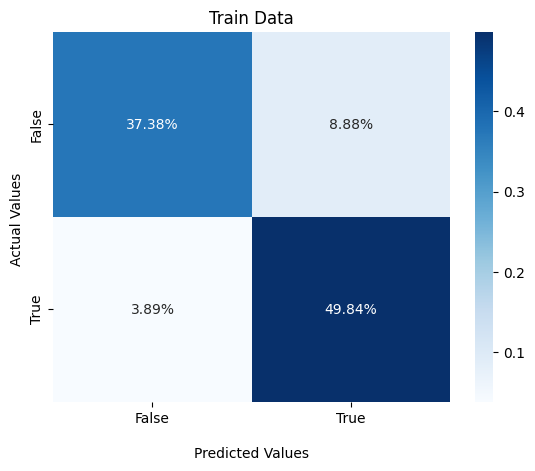

In [45]:
conf_train=confusion_matrix(y_train,pred_train)
print("Accuracy: "+str(accuracy_score(y_train,pred_train)*100))
print("Recall: "+str(recall_score(y_train, pred_train)*100))
ax = sns.heatmap(conf_train/np.sum(conf_train), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Train Data');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Accuracy: 84.05797101449275
Recall: 86.50306748466258


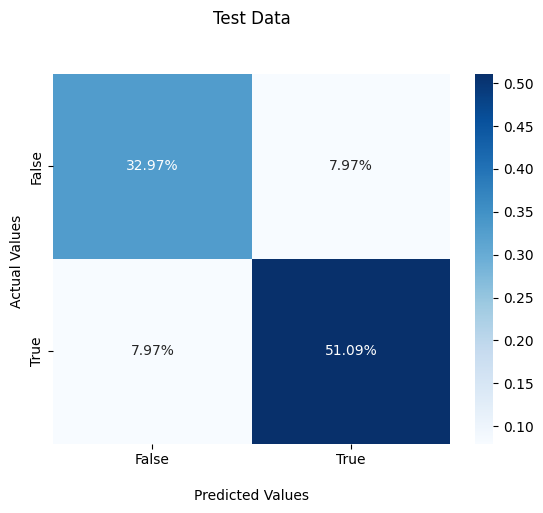

In [46]:
conf_test=confusion_matrix(y_test,pred_test)
print("Accuracy: "+str(accuracy_score(y_test,pred_test)*100))
print("Recall: "+str(recall_score(y_test, pred_test)*100))
ax = sns.heatmap(conf_test/np.sum(conf_test), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Test Data\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.8351702046799501


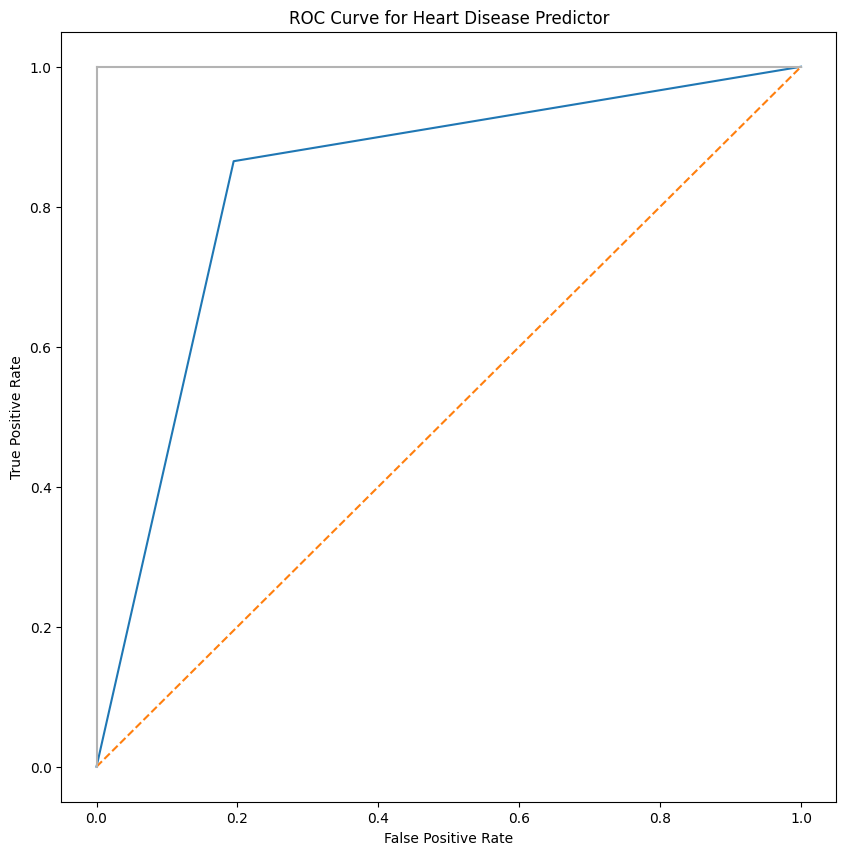

In [47]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_test)
auc=roc_auc_score(y_test,pred_test)
print(auc)
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve for Heart Disease Predictor')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()